In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Path to your CSV file
file_path="Data/TRAIN.csv"
# Read the CSV file
train_df = pd.read_csv(file_path)

# Display the first few rows
print(train_df.head())

         ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52  


In [3]:
# Display the last few rows
print(train_df.tail())

              ID  Store_id Store_Type Location_Type Region_Code        Date  \
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R1  2019-05-31   

        Holiday Discount  #Order     Sales  
188335        1      Yes      51  37272.00  
188336        1       No      90  54572.64  
188337        1       No      56  31624.56  
188338        1      Yes      70  49162.41  
188339        1       No      47  37977.00  


In [4]:
# Path to your CSV file
file_path="Data/TEST_FINAL.csv"
# Read the CSV file
test_df = pd.read_csv(file_path)

# Display the first few rows
print(test_df.head())

         ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No  


In [5]:
#information about the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
#summary statistic: numerical features
train_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [7]:
#summary statistic: categorical features
train_df.describe(include=object)

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1000001,S1,L1,R1,2018-01-01,No
freq,1,88752,85140,63984,365,104051


In [8]:
#checking for missing values
train_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

**Insights:**

**1.Data Types and Non-null counts:**
 - The dataset contains 188,340 entries and 10 columns.
 - Data Types: There are 6 columns with 'object' data type, 3 columns with 'int64' data type and 1 column with 'float64' data type.
   -- Numercial Features: These include features like Store_id, Holiday, #Order and Sales.
   -- Categorcial Features : These include features like ID, Store_Type, Location_Type,	Region_Code, Date and Discount.

**2.Summary Statistics:**

# Numerical Features:
 -- The target variable 'Sales' column has a mean of 42,784.3279 and a standard deviation of 18456.708, indicating high variability in sales (as the standard deviation is large relative to the mean)
 -- Minimun Sales as low as 0 suggest missing or non-productive records and maximun Sales as high as 247,215, representing a significant range.
 -- Store IDs range from 1 to 365, suggesting we might have 365 unique stores also count 188,340 entries, meaning we have data for 188,340 transactions or records.
 -- Holiday mean 0.13 indicates that around 13.1% of transactions happened on holidays.
 --In Orders column, the average number of orders per record is 68.21. Some records show 0 orders, these might represent data errors or non-productive days. Also the maximum number of orders in a single transaction or day is 371.

# Categorical Features:

  -- In 'ID' column, there are 188,340 unique IDs, matching the total number of rows. This implies that each record has a unique identifier.
  -- 4 unique 'store types' (S1, S2, S3, S4). S1 is the most frequent store type. Also 88,752 records belong to S1, which constitutes ~47% of the data (88752/188340).
  -- There are 5 unique location types (L1, L2, etc.). L1 is the most frequent location type. Also 85,140 records belong to L1, which constitutes ~45% of the data (85140/188340).
  --There are 4 unique region codes (R1, R2, etc.). R1 is the most frequent region code.Also 63,984 records belong to R1, which constitutes ~34% of the data (63984/188340).
  -- In date column,188,340 entries, no missing values.

**3.Missing Value Detection**

  -- As we can understand from the above dataset , it is evident that there are no missing values.

**4.Outlier Detection**

  -- Features like Both Sales and #Order are likely right-skewed, as the mean is greater than the median (50th percentile).
  -- The max value of Sales (247,215) is much larger than the 75th percentile (51,909), indicating potential outliers. Similarly, the max number of orders (371) could be an outlier compared to the 75th percentile (82).
 

In [9]:
#drop 'ID' column from the dataset as it doesnot provide much insights
train_df = train_df.drop('ID', axis=1)

In [10]:
#checking for duplicates
train_df.duplicated().sum()

np.int64(0)

In [11]:
#checking value counts for categorical columns
categorical_features = train_df.select_dtypes(include='object').columns
for col in categorical_features:
    print(train_df[col].value_counts())

Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64
Date
2018-01-01    365
2018-11-20    365
2018-12-20    365
2018-12-19    365
2018-12-18    365
             ... 
2018-06-16    365
2018-06-15    365
2018-06-14    365
2018-06-13    365
2019-05-31    365
Name: count, Length: 516, dtype: int64
Discount
No     104051
Yes     84289
Name: count, dtype: int64


In [12]:
#converting the date column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Date']

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
188335   2019-05-31
188336   2019-05-31
188337   2019-05-31
188338   2019-05-31
188339   2019-05-31
Name: Date, Length: 188340, dtype: datetime64[ns]

**1. Univariate Analysis:**

1.Numerical Univariate Analysis : Plotting the distribution of the Numerical features (Sales, Orders) using a histogram and KDE
2.Categorcial Univariate Analysis: Plotting the distribution of the Categorical features (Store_Type, Location_type, Recgion_code,Discount,Holiday) using a Barplot/Countplot.

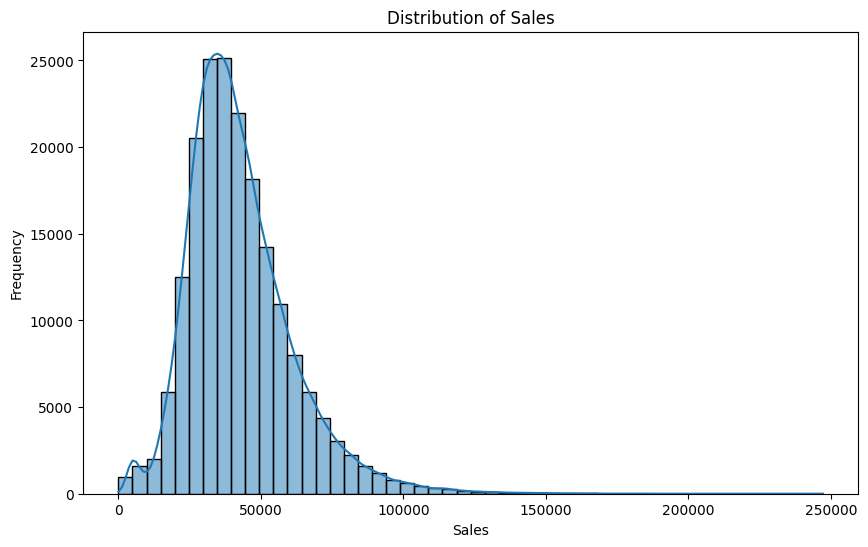

In [13]:
#Analysing Numerical Feature: Sales
plt.figure(figsize=(10,6))
sns.histplot(train_df['Sales'], kde=True, bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

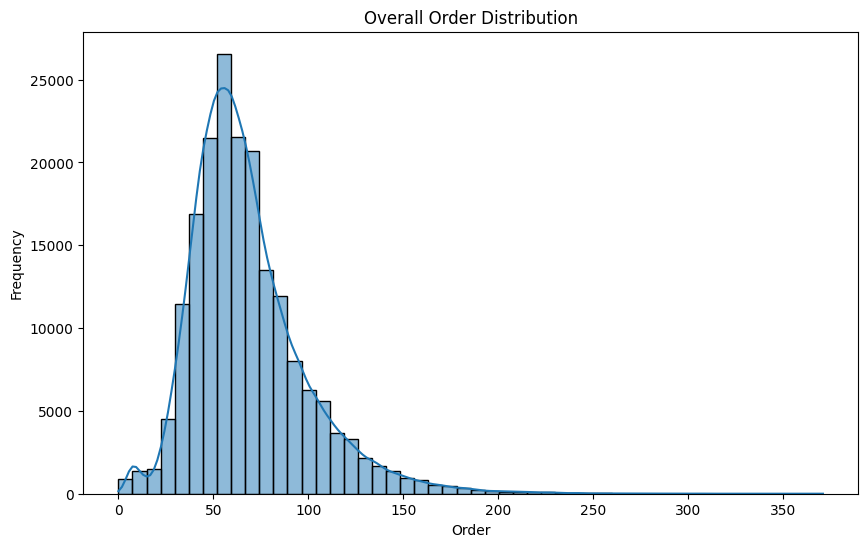

In [14]:
#Analysing Numerical Feature: Orders
plt.figure(figsize=(10,6))
sns.histplot(train_df['#Order'], kde=True, bins=50)
plt.title('Overall Order Distribution')
plt.xlabel('Order')
plt.ylabel('Frequency')
plt.show()

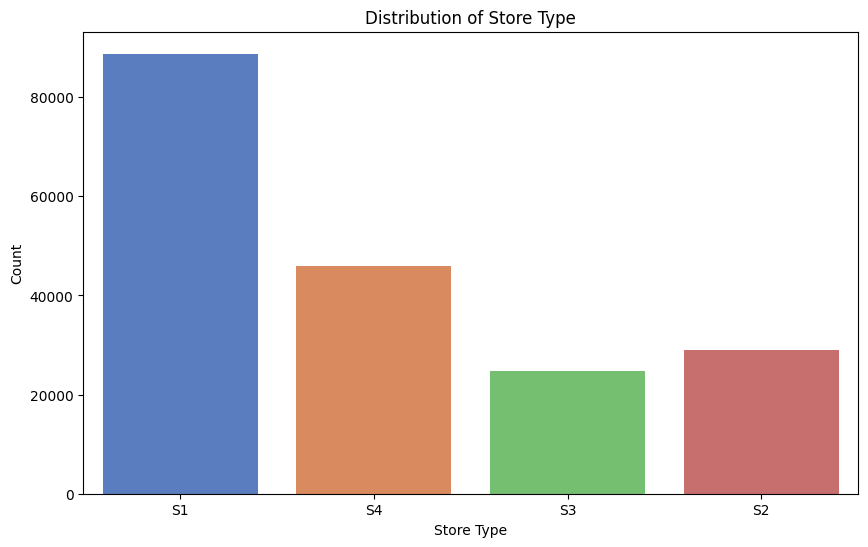

In [15]:
#Analysing Categorical Feature: Store Type
plt.figure(figsize=(10,6))
sns.countplot(x='Store_Type', data=train_df, palette='muted')
plt.title('Distribution of Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

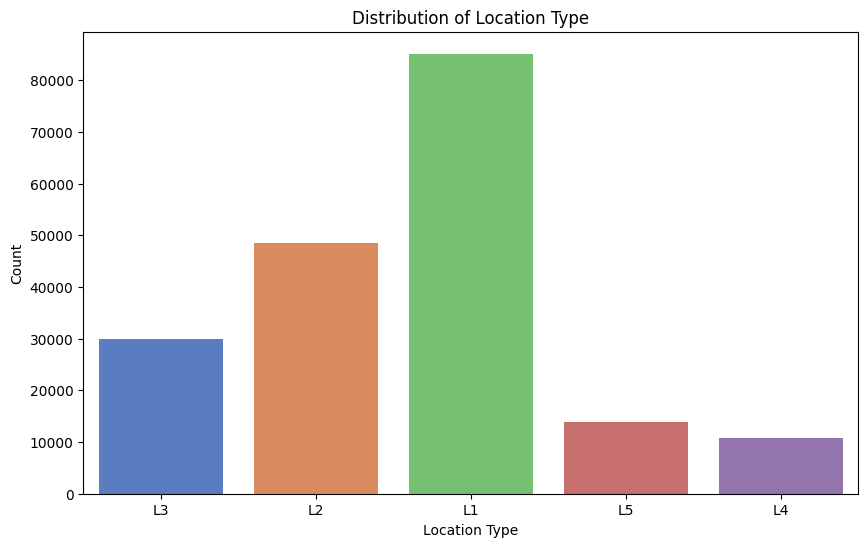

In [16]:
#Analysing Categorical Feature: Location Type
plt.figure(figsize=(10,6))
sns.countplot(x='Location_Type', data=train_df, palette='muted')
plt.title('Distribution of Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

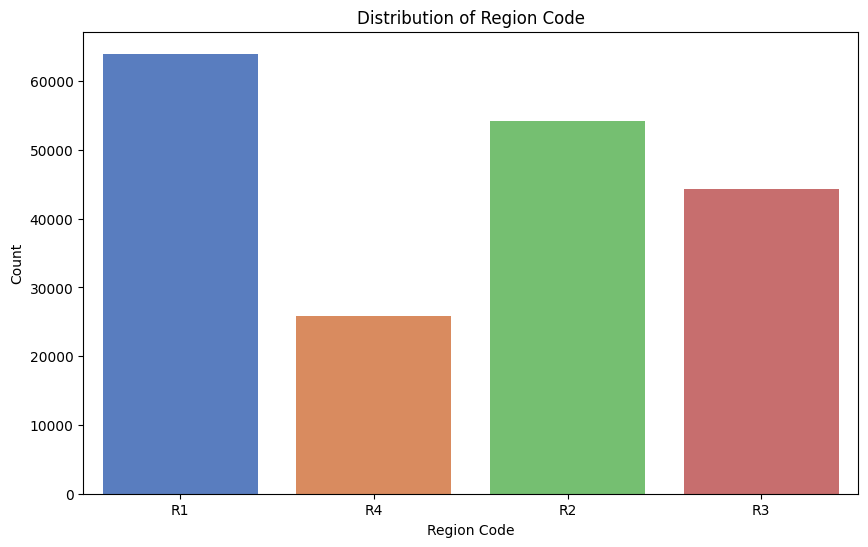

In [17]:
#Analysing Categorical Feature: Region Code
plt.figure(figsize=(10,6))
sns.countplot(x='Region_Code', data=train_df, palette='muted')
plt.title('Distribution of Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.show()

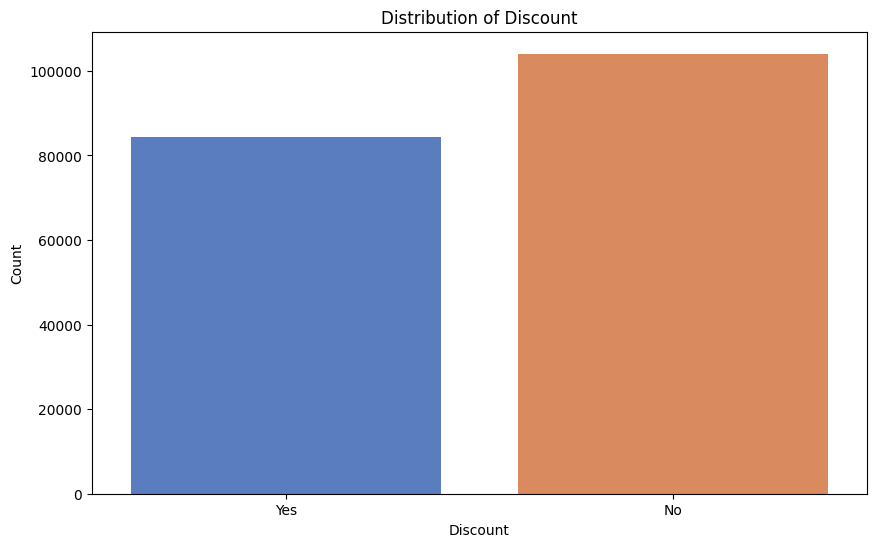

In [18]:
#Analysing Categorical Feature: Discount
plt.figure(figsize=(10,6))
sns.countplot(x='Discount', data=train_df, palette='muted')
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

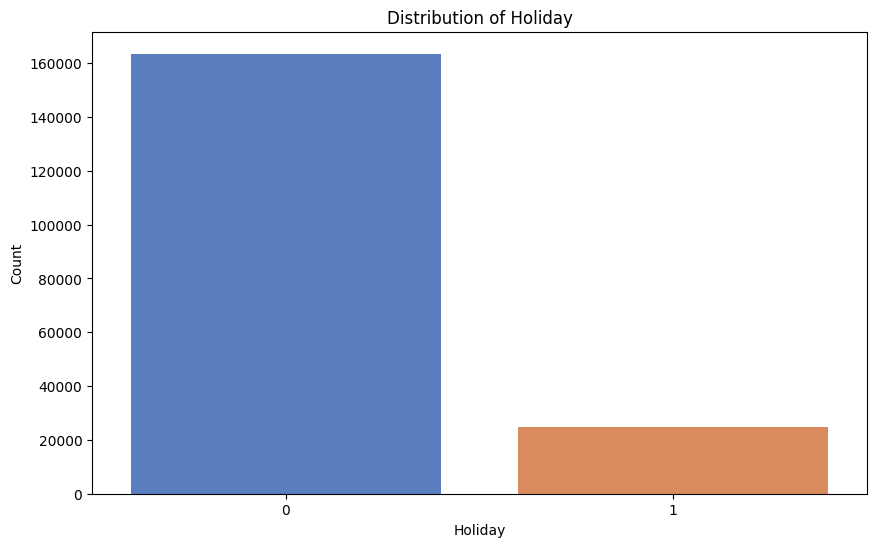

In [19]:
#Analysing Categorical Feature: Holiday
plt.figure(figsize=(10,6))
sns.countplot(x='Holiday', data=train_df, palette='muted')
plt.title('Distribution of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

**Univariate Analysis:**

# 1.Sales and Orders Distribution(Numerical Feature):
  -- The distribution of both sales and orders are positively skewed/ right skewed. 
  -- The majority of sales price falling between $20,000 and $70,000. The peak frequency is around 50,000 mark. Similarly the majority of the orders falling between 30 and 100. Also the peak frequency is around 60 mark.
  -- Implication(Sales): Most transactions generate low to moderate sales, with a few generating exceptionally high sales. Also indicates inequality in sales distribution, where a small fraction of transactions significantly influences total revenue.
  -- Implication(Orders): Most customers place smaller orders, with a few placing large or bulk orders.
# 2. Distribution of Store_Type, Location_type, Recgion_code, Holiday and Discount(Categorical Feature):

  -- These categorical variables have a small number of unique values (4-5). Some categories dominates (like S1 in Store Type, R1 in Region Code, L1 in Location Type )
  -- In Discount,2 unique values (Yes, No), indicating a binary categorical variable. 'No' is the most frequent value, meaning the majority of transactions didn't involve discounts.
  -- We need to perform Bivariate analysis to understand the correlation between these categories and numerical variables like Sales and Orders.
  -- Only 13.1% of transactions occurred on holidays, so we might analyze the impact of holidays on sales and orders.

**2. Bivariate Analysis:**

1. Categorical vs Numerical Analysis: Plots the relationship between a categorical variable and a numerical variable using Boxplot.
2. Numerical vs Numerical Analysis : Plots the relationship between two numerical variables using ScatterPlot.
3. Categorical vs Categorical Analysis: Plots the relationship between two categorical variables using Heatmap and Stacked Bar

**Categorical vs Numerical Analysis**

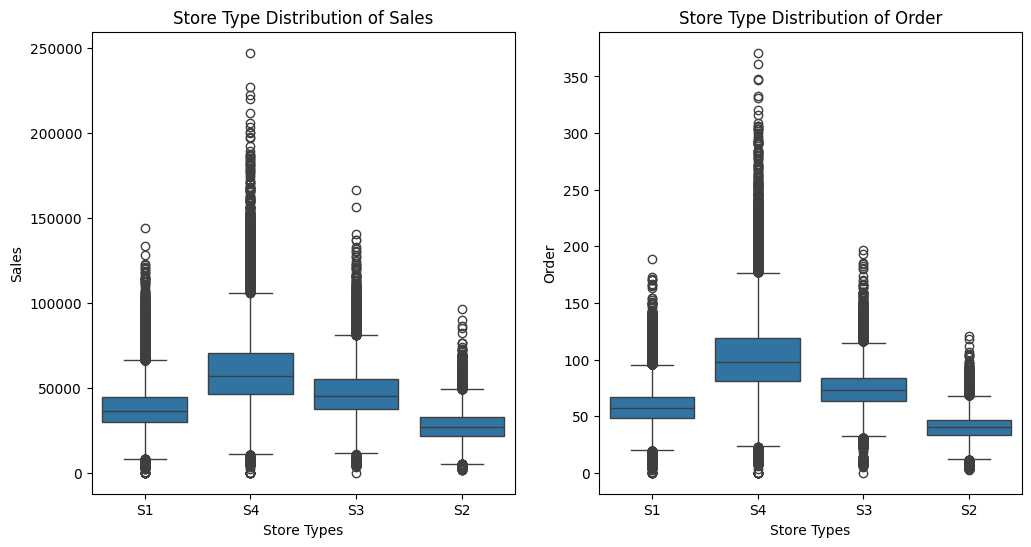

In [20]:
#Analysing the relationship between categorical variable(Store Type) and numerical variables(Sales and Order):
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x='Store_Type', y='Sales', data=train_df)
plt.title('Store Type Distribution of Sales')
plt.xlabel('Store Types')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Store_Type', y='#Order', data=train_df)
plt.title('Store Type Distribution of Order')
plt.xlabel('Store Types')
plt.ylabel('Order')

plt.show()

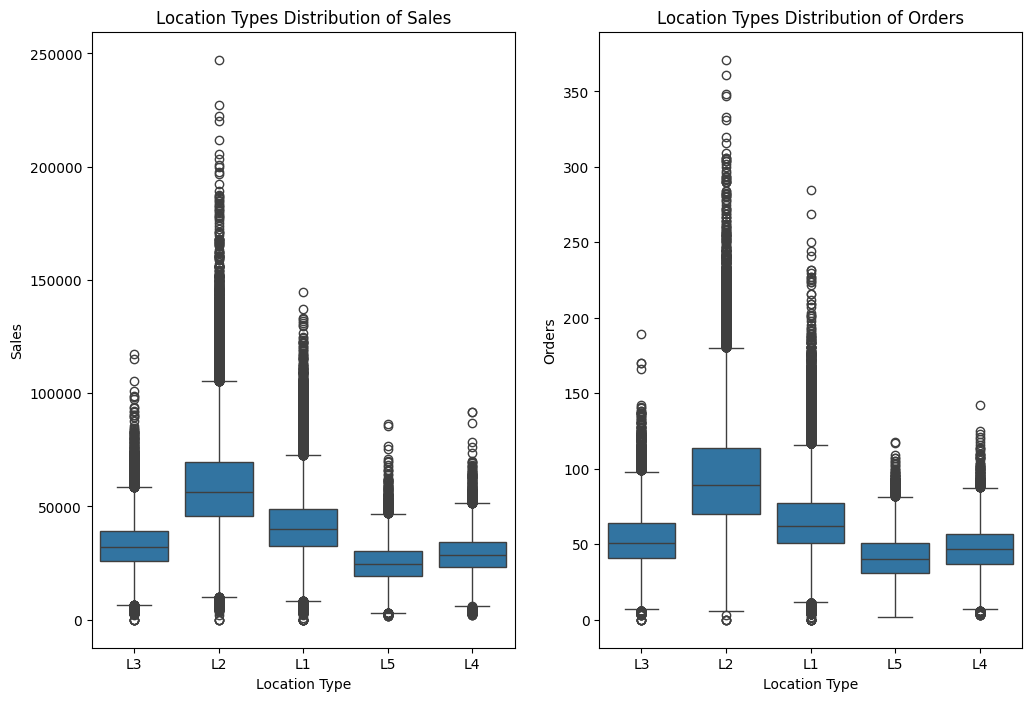

In [21]:
#Analysing the relationship between categorical variable(Location Type) and numerical variables(Sales and Order):
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(x='Location_Type', y='Sales', data=train_df)
plt.title('Location Types Distribution of Sales')
plt.xlabel('Location Type')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Location_Type', y='#Order', data=train_df)
plt.title('Location Types Distribution of Orders')
plt.xlabel('Location Type')
plt.ylabel('Orders')

plt.show()

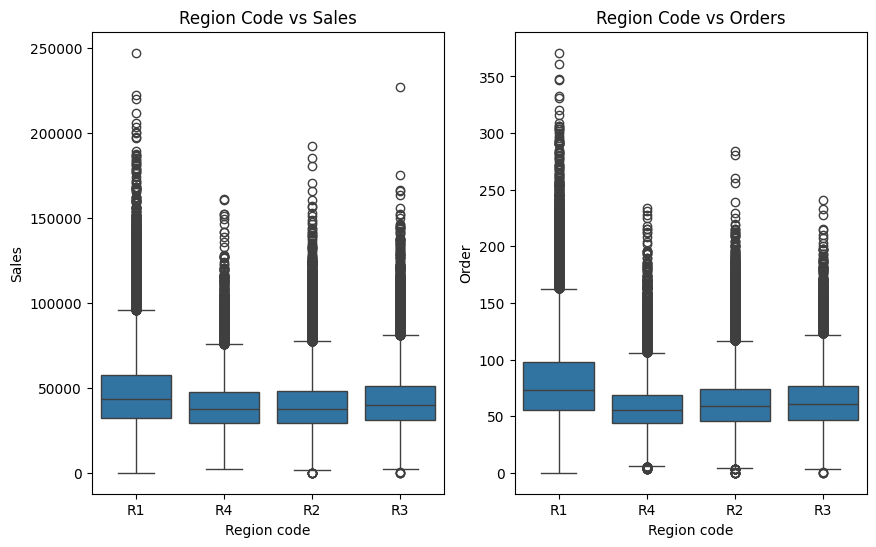

In [22]:
#Analysing the relationship between categorical variable(Region_Code) and numerical variables(Sales and order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Region_Code', y='Sales', data=train_df)
plt.title('Region Code vs Sales')
plt.xlabel('Region code')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Region_Code', y='#Order', data=train_df)
plt.title('Region Code vs Orders')
plt.xlabel('Region code')
plt.ylabel('Order')

plt.show()

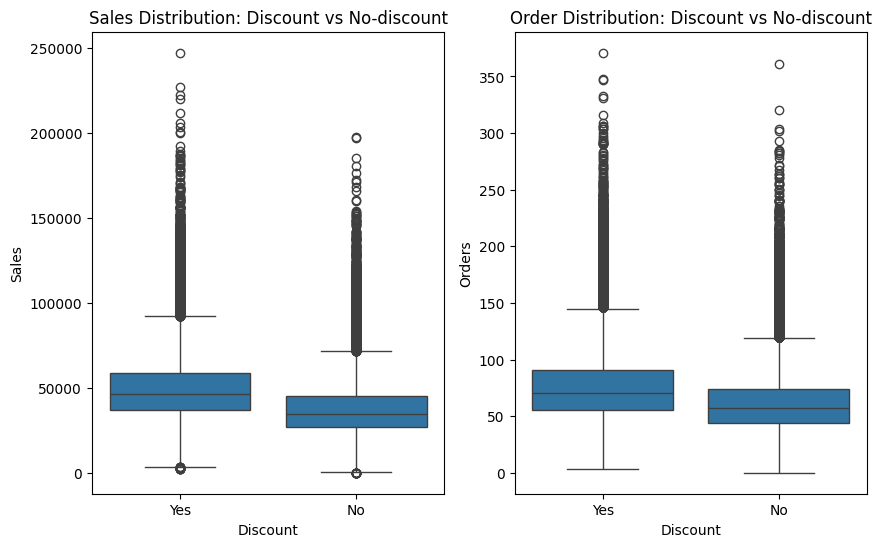

In [23]:
#Analysing the relationship between a categorical variable(Discount) and a numerical variables(Sales and Order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Discount', y='Sales', data=train_df)
plt.title('Sales Distribution: Discount vs No-discount')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Discount', y='#Order', data=train_df)
plt.title('Order Distribution: Discount vs No-discount')
plt.xlabel('Discount')
plt.ylabel('Orders')

plt.show()

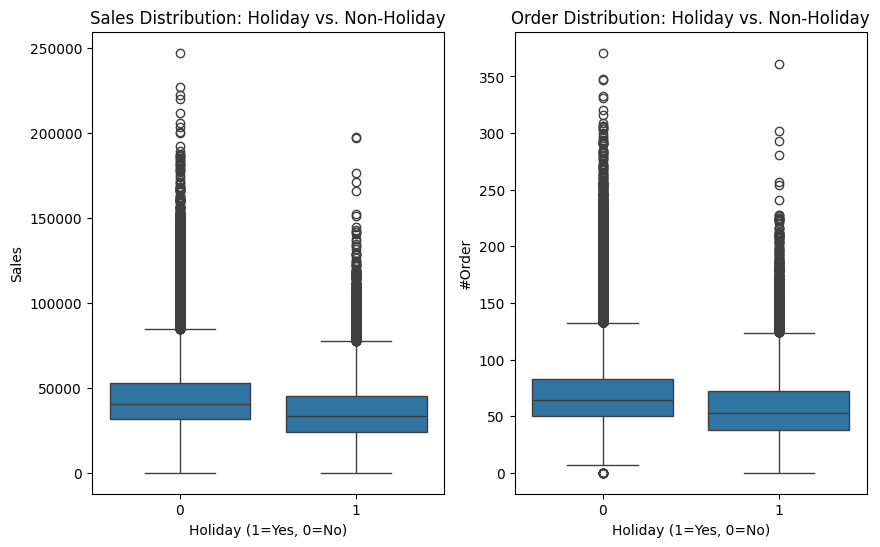

In [24]:
#Analysing the relationship between a categorical variable(Holiday) and a numerical variables(Sales and Order):
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='Holiday', y='Sales', data=train_df)
plt.title('Sales Distribution: Holiday vs. Non-Holiday')
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(x='Holiday', y='#Order', data=train_df)
plt.title('Order Distribution: Holiday vs. Non-Holiday')
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('#Order')

plt.show()

**Numerical vs Numerical Analysis:**

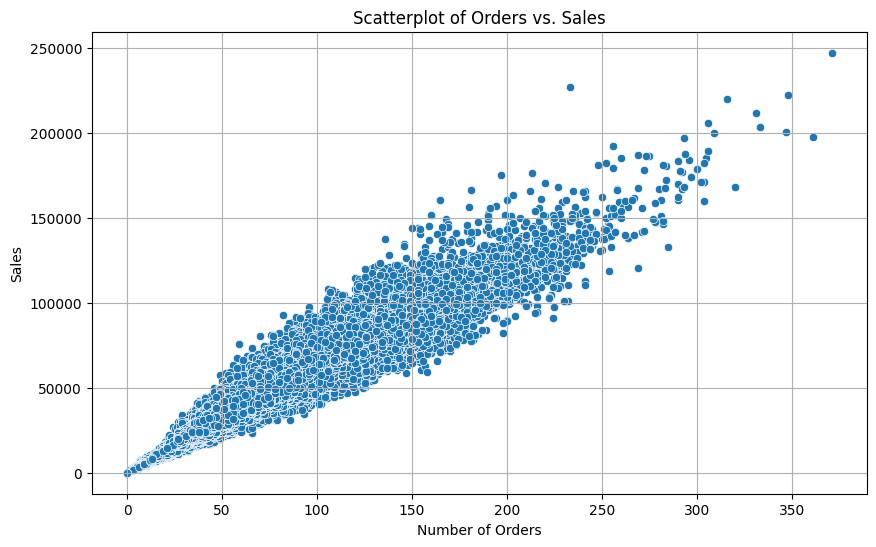

In [25]:
#Analysing the relationship between Two Numerical Features(Sales vs Orders)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', data=train_df)
plt.title('Scatterplot of Orders vs. Sales')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

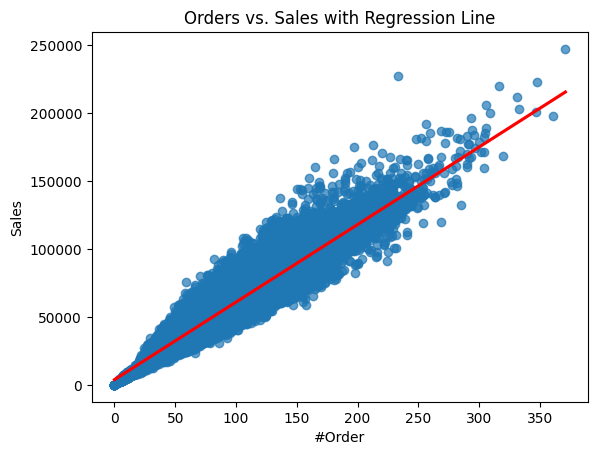

In [26]:
#adding a regression line to understand the overall trend
sns.regplot(x='#Order', y='Sales', data=train_df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Orders vs. Sales with Regression Line')
plt.show()

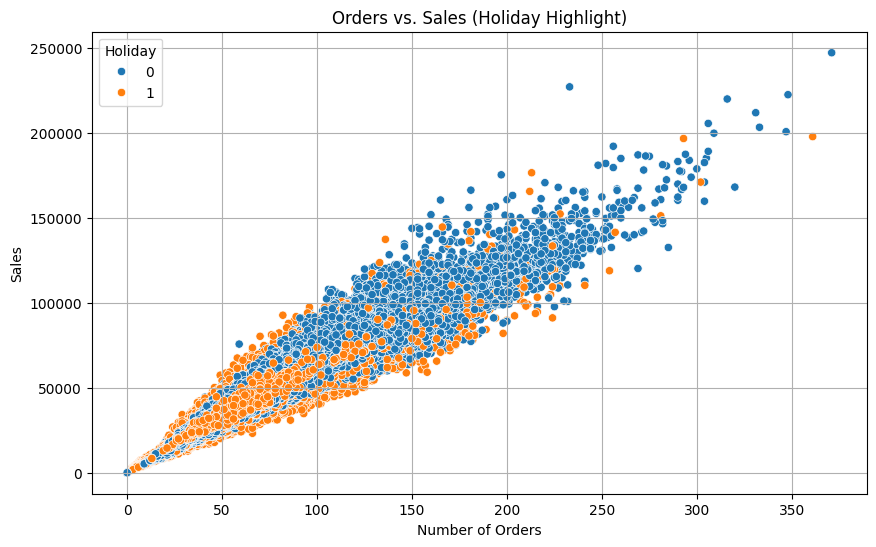

In [27]:
#Analysing the relationship between Sales vs Orders( Holiday based)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', hue='Holiday', data=train_df)
plt.title('Orders vs. Sales (Holiday Highlight)')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

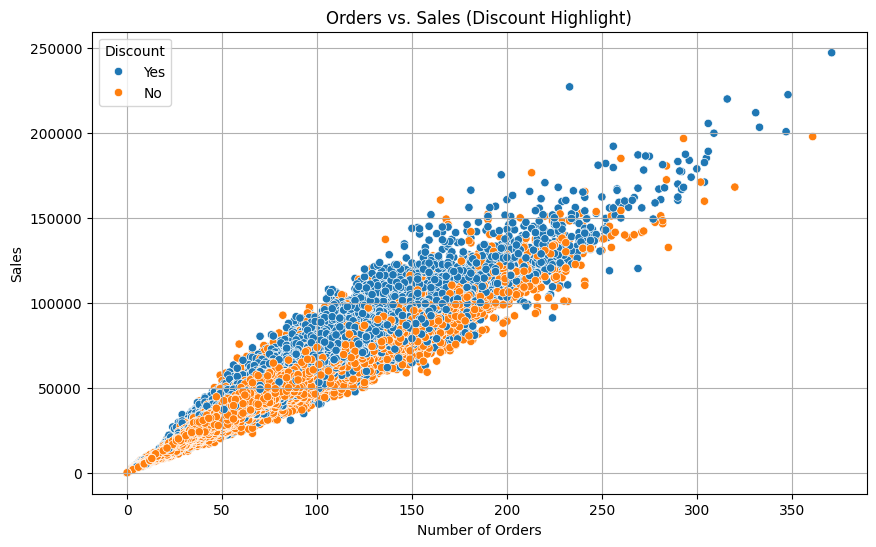

In [28]:
#Analysing the relationship between Sales vs Orders( Discount based)
plt.figure(figsize=(10,6))
sns.scatterplot(x='#Order', y='Sales', hue='Discount', data=train_df)
plt.title('Orders vs. Sales (Discount Highlight)')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

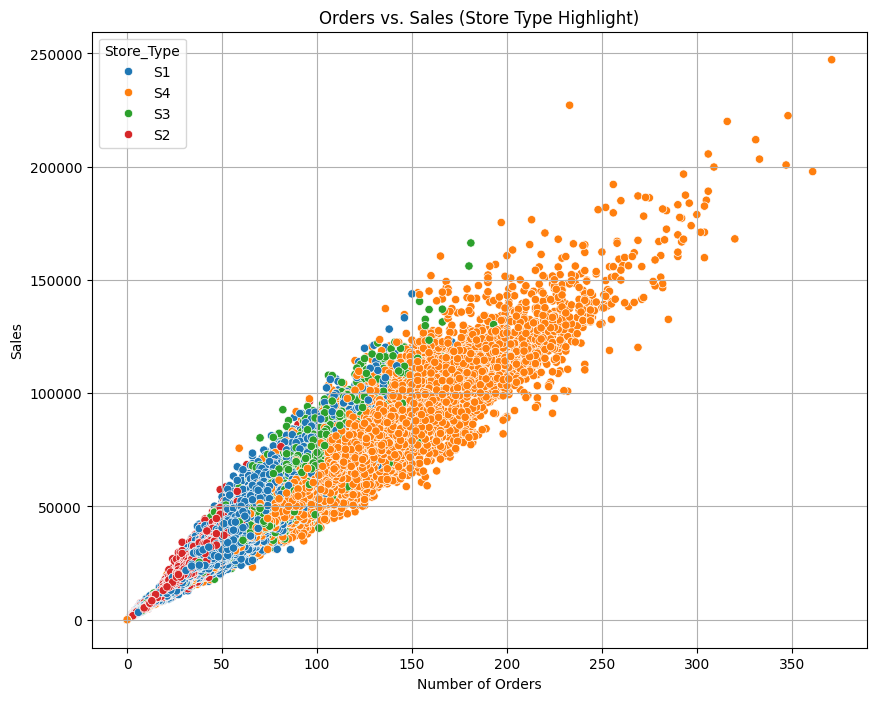

In [29]:
#Analysing the relationship between Sales vs Orders( Store Type based)
plt.figure(figsize=(10,8))
sns.scatterplot(x='#Order', y='Sales', hue='Store_Type', data=train_df)
plt.title('Orders vs. Sales (Store Type Highlight)')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

**Categorical vs Categorical Analysis**

<Axes: xlabel='Location_Type', ylabel='Store_Type'>

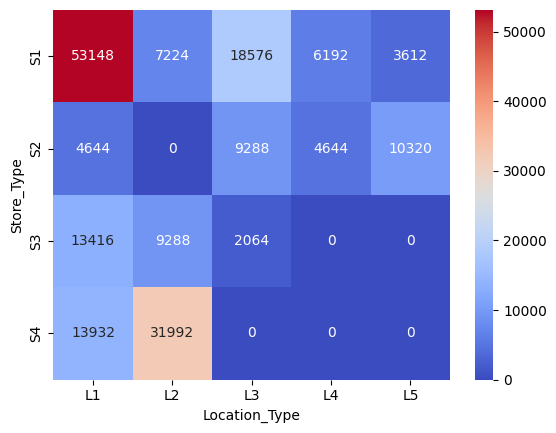

In [30]:
#Analysing the relationship between Store Type and Location Type
crosstab = pd.crosstab(train_df['Store_Type'], train_df['Location_Type'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')

<Axes: xlabel='Store_Type'>

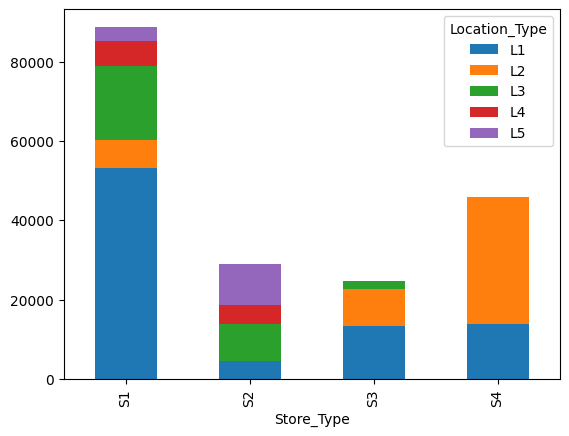

In [31]:
#analysis using stacked bar
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Region_Code', ylabel='Store_Type'>

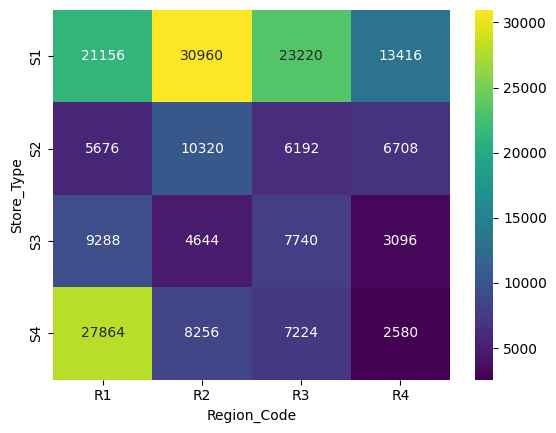

In [32]:
#Analysing the relationship between Store Type and Region Code
crosstab = pd.crosstab(train_df['Store_Type'], train_df['Region_Code'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')

<Axes: xlabel='Region_Code', ylabel='Location_Type'>

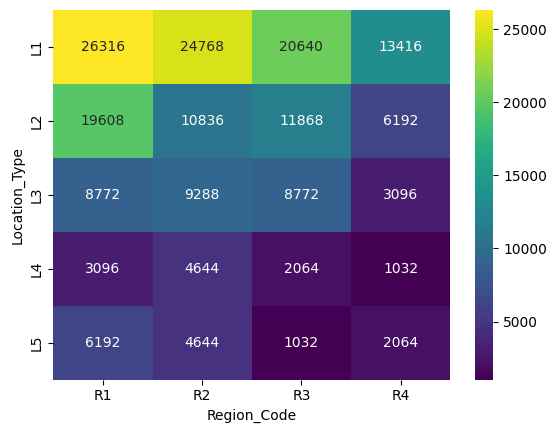

In [33]:
#Analysing the relationship between Location Type and Region Code
crosstab = pd.crosstab(train_df['Location_Type'], train_df['Region_Code'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')

**Bivariate Analysis:**

# 1.Categorical vs Numerical:
 -- Store Type vs Sales/Orders
Insight: Store Type S4 is the highest contributor to overall sales and orders, indicating its significant performance. However, S1 has the highest transaction count, suggesting a larger customer base but lower average sales per transaction.
Observation: Boxplot analysis reveals a high number of outliers across all store types, with S4 showing the highest number of extreme values.
Implication: Focus on S1 to increase sales per transaction through upselling or targeted promotions. Investigate the outliers in S4 to understand exceptional transactions that could be leveraged.

--Location Type vs Sales/Orders
Insight: Location Type L2 is the top-performing location, contributing the most to both overall sales and orders. In contrast, L1 has the highest transaction count but lower sales.
Observation: L2 also has the highest number of outliers in sales and orders.
Implication: For L1, strategies should aim to increase the average sales value per transaction. Analyze L2’s outliers to identify patterns (e.g., bulk purchases) that can be replicated elsewhere.

--Region Code vs Sales/Orders
Insight: Region R1 performs the best in terms of sales and orders, with the highest transaction count.
Observation: Similar to Location Type, R1 exhibits a significant number of outliers in sales.
Implication: Prioritize maintaining high performance in R1 while examining the outliers for unique transactions that could inform broader strategies.

--Discount vs Sales/Orders
Insight: Sales and orders are higher when discounts are applied, as evident from boxplot analysis. However, the majority of transactions in the dataset occur without discounts.
Observation: Outliers during discounted transactions may indicate significant sales spikes or bulk orders.
Implication: Discounts are effective in driving sales but should be strategically applied to maximize profitability. Explore outliers during discounts to design more targeted campaigns.

--Holiday vs Sales/Orders
Insight: Non-holiday periods contribute more to overall sales and orders, despite holidays being less frequent.
Observation: Outliers are present in both holiday and non-holiday sales, but sales are generally lower during holidays.
Implication: Holiday campaigns should focus on driving higher sales through promotions or special offers, as non-holiday periods dominate the dataset’s revenue.

# 2. Numerical vs Numerical Analysis
--Sales vs Orders
Insight: A strong positive correlation exists between sales and orders, as observed in scatterplots. Higher orders are generally associated with higher sales.
Observation: A few outliers are visible, representing transactions with exceptionally high sales or orders.
Implication: Leverage this relationship by encouraging larger orders through discounts or bundle offers. Investigate outliers to understand their context and replicate these high-value transactions.
--Sales vs Orders (Hue: Holiday)
Insight: Scatterplot analysis shows that higher sales and orders occur during non-holiday periods, while holidays see relatively lower sales and orders.
Observation: Non-holiday transactions dominate, but opportunities may exist to enhance holiday sales.
Implication: Tailor holiday promotions to increase sales volume. Analyze customer preferences during holidays to craft targeted marketing campaigns.
--Sales vs Orders (Hue: Discount)
Insight: High sales are associated with discounted transactions, but the scatterplot also reveals a significant number of orders without discounts.
Observation: Some high sales occur even without discounts, suggesting that factors beyond discounts (e.g., product type, store location) may influence these sales.
Implication: While discounts drive volume, focus on enhancing non-discounted sales by promoting premium products or offering personalized recommendations.
--Sales vs Orders (Hue: Store Type)
Insight: Store Type S4 dominates in terms of both sales and orders, while S2 performs the lowest.
Observation: Outliers in S4 indicate exceptional transactions, while S2 has limited orders and sales overall.
Implication: Consider strategies to improve performance in S2, such as targeted promotions or optimizing product offerings. Analyze S4’s outliers for successful patterns to implement across other store types.

# 3. Categorical vs Categorical Analysis
Region Code vs Store Type:
-- R2 and S1: This is the most frequent combination, with 30,960 entries. This suggests S1 stores thrive in R2, possibly reflecting regional customer preferences or better operational fit.
--R1 and S4: The next significant combination shows a strong preference for S4 in R1, suggesting this region might have higher-value transactions or larger store footprints.

Store Type vs Location Type:
--L1 and S1: This combination dominates, with the highest count (53,148). It suggests that store type S1 is more suited to location type L1, possibly due to operational factors, customer preference, or geographical suitability.
--L2 and S4: The second-highest combination (31,992) implies that S4 stores are concentrated in L2, perhaps reflecting a strategic focus in medium-to-high density areas.

Location Type vs Region Code:
-- R1 and L1's high count could indicate that this combination has proven operational success. Expanding similar location types in regions with similar characteristics might yield positive results.

**3. Multivariate Analysis**
--Perform a comprehensive multivariate analysis by generating a correlation heatmap and pairplot.

In [34]:
correlation_matrix = train_df[['Store_id',	'#Order',	'Sales']]
correlation_matrix

,Store_id,#Order,Sales
0,1,9,7011.84
1,253,60,51789.12
2,252,42,36868.20
3,251,23,19715.16
4,250,62,45614.52
...,...,...,...
188335,149,51,37272.00
188336,153,90,54572.64
188337,154,56,31624.56
188338,155,70,49162.41


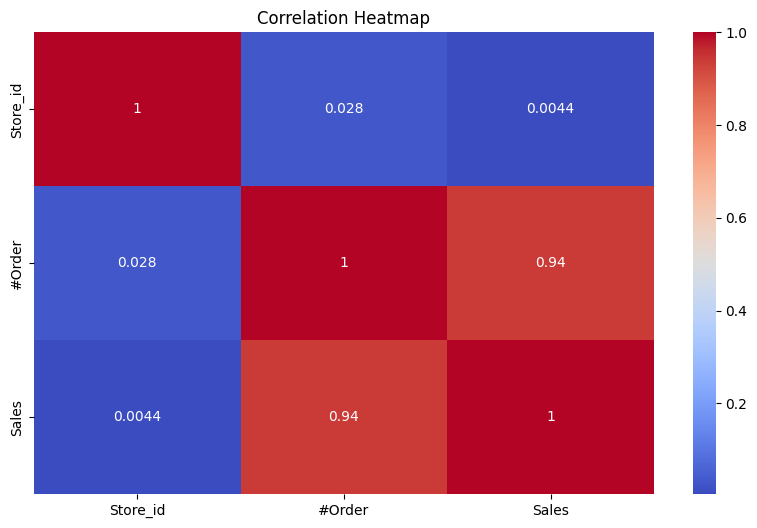

In [35]:
#Displays a correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

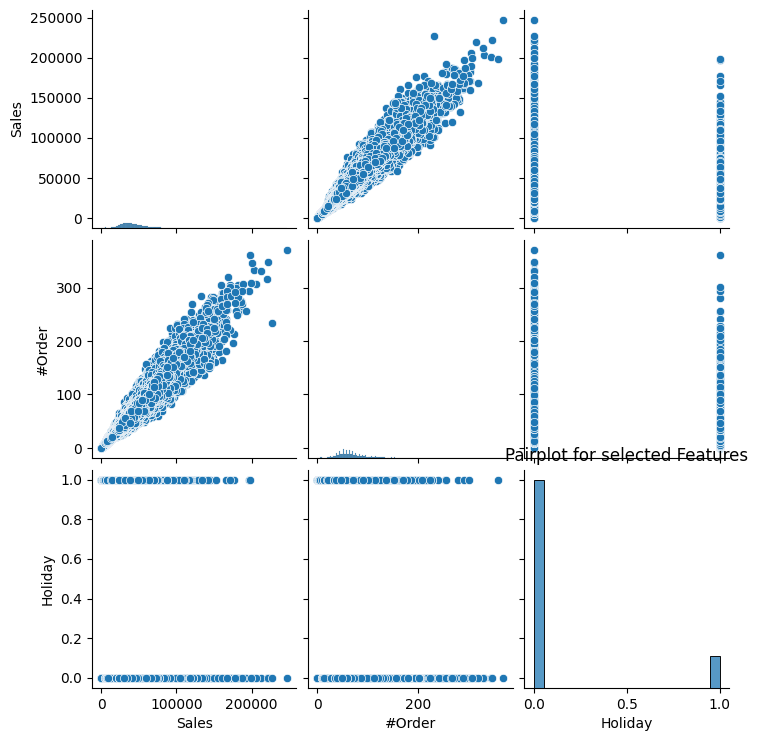

In [36]:
#generates and displays pairplot
selected_features = train_df[['Sales', 'Discount', 'Store_Type', '#Order','Holiday']]
sns.pairplot(selected_features)
plt.title('Pairplot for selected Features')
plt.show()

**Multivariate Analysis**

# **Correlation Heatmap and Pairplot: **
 --Based on the correlation heatmap, we can confirm that our previous analysis aligns well with the observed trends, indicating a solid analytical direction. The heatmap reveals a very strong positive correlation between sales and orders, with a correlation coefficient of approximately 0.94. 
 Additionally:
--Store_Type demonstrates a moderate positive correlation with both sales (0.49) and orders (0.58), suggesting that the type of store significantly influences these metrics.
--Discount shows a mild positive correlation with sales (0.32) and orders (0.23), indicating that discounts contribute positively, albeit less strongly, to these outcomes.
--Conversely, Region_Code, Location_Type, and Holiday exhibit negative correlations with both sales and orders, suggesting an inverse relationship where these factors may hinder overall performance.


**OUTLIER DETECTION - Square Root Transformation**
The distribution appears to be rightly skewed(Sales, Order). Since, most of the statistical tests and algorithms requires the data to be normally distributed. Another advantage is that regression algorithms especially linear regression performs better for normally distributed dependent variable. So, we will use square root transformation to transform the data.

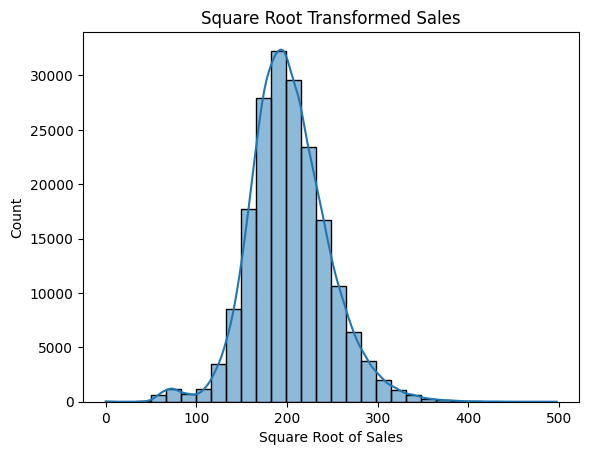

In [37]:
#Apply squre root transformation on sales
train_df['sqrt_sales'] = train_df['Sales'].apply(lambda x: np.sqrt(x))
sns.histplot(train_df['sqrt_sales'], bins=30, kde=True)
plt.title('Square Root Transformed Sales')
plt.xlabel('Square Root of Sales')
plt.ylabel('Count')
plt.show()


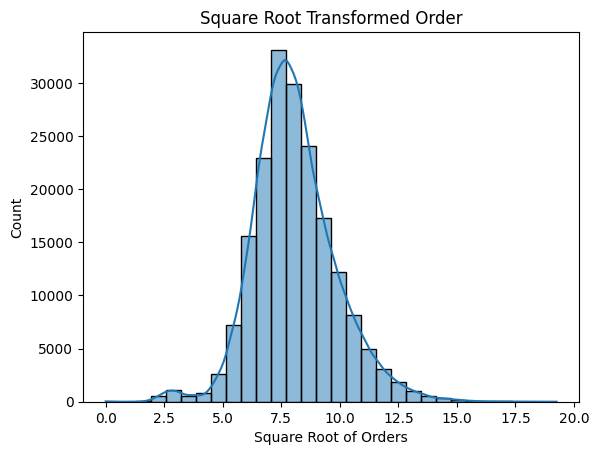

In [38]:
#Apply squre root transformation on orders
train_df['sqrt_orders'] = train_df['#Order'].apply(lambda x: np.sqrt(x))
sns.histplot(train_df['sqrt_orders'], bins=30, kde=True)
plt.title('Square Root Transformed Order')
plt.xlabel('Square Root of Orders')
plt.ylabel('Count')
plt.show()

Insights:
The plot we get post square root transformation looks like normally distributed and the right skewness reduced.

**Hypothesis Testing**
--1. Impact of Discounts on Sales
--2. Effect of Holidays on Sales
--3. Sales Differences Across Store Types
--4. Regional Sales Variability
--5. Correlation Between Number of Orders and Sales


In [39]:
#Analysis to understand the impact of Discounts on sales using two-sample t-test
# Null Hypothesis (H0): The mean sales on days with discounts are equal to the mean sales on days without discounts.
# Alternative Hypothesis(H1): The mean sales on days with discounts are higher than on days without discounts.
from scipy.stats import ttest_ind
sales_with_discount = train_df[train_df['Discount'] == 'Yes']['sqrt_sales']
sales_without_discount = train_df[train_df['Discount'] == 'No']['sqrt_sales']

t_stat, p_value = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 153.2597126361024, P-value: 0.0


In [40]:
#Analysis to understand the impact of Holiday on sales using two-sample t-test
# Null Hypothesis (H0): The mean sales on Holidays are equal to the mean sales on Non-Holidays.
# Alternative Hypothesis(H1): The mean sales on Holidays are higher than on Non-Holidays
sales_holiday = train_df[train_df['Holiday'] == 1]['sqrt_sales']
sales_non_holiday = train_df[train_df['Holiday'] == 0]['sqrt_sales']

t_stat, p_value = ttest_ind(sales_holiday, sales_non_holiday, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -70.78506797909186, P-value: 0.0


In [41]:
#Analysis to understand the Sales Differences Across Store Types
# Null Hypothesis (H0): The mean sales are the same across all store types.
# Alternative Hypothesis(H1): At least one store type has a significantly different mean sales.
from scipy.stats import f_oneway

# Group the dataset by 'Store_Type' and extract raw 'Sales' data for each store type
store_sales = [group['sqrt_sales'] for _, group in train_df.groupby('Store_Type')]
f_stat, p_value = f_oneway(*store_sales)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 34474.76476345863, P-value: 0.0


In [42]:
#Regional sales Variability analysis: KS-Test
#H0: The mean sales are the same across all regions.
#H1: At least one region has significantly different sales.
from scipy.stats import kruskal

region_sales = [group['sqrt_sales'] for _, group in train_df.groupby('Region_Code')]
h_stat, p_value = kruskal(*region_sales)
print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Kruskal-Wallis H-statistic: 3968.063590460681, P-value: 0.0


In [43]:
#Correlation Between Number of Orders and Sales
#H0: There is no correlation between the number of orders and sales.
#H1: There is a significant correlation between the number of orders and sales.

from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(train_df['sqrt_orders'], train_df['sqrt_sales'])
print(f"Pearson Correlation Coefficient: {corr_coeff}, P-value: {p_value}")

Pearson Correlation Coefficient: 0.9486033380523916, P-value: 0.0


Hypothesis testing:
-- Conclusion 1: Since p-value ≈ 0.00, reject H₀. Discounts have a significant impact on sales. Sales differ significantly between days with discounts and without discounts.
--Conclusion 2: Since p-value ≈ 0.00, reject H₀. There is a significant difference in sales between holidays and non-holidays. You can further analyze whether holidays lead to higher or lower sales by examining the means or visualizing the data.
--Conclusion 3: Since p-value ≈ 0.00, reject H₀. Sales vary significantly across store types.
--Conclusion 4: Since p-value ≈ 0.00, reject H₀. There is significant variability in sales across regions.
--Conclusion 5: Since p-value ≈ 0.00, reject H₀. There is a significant correlation between the number of orders and sales. Based on the data, higher orders are associated with higher sales.

**Data Pre-processing**

In [44]:
def create_features(train_df):
    '''''Create time series features based on time series Index'''''

    train_df['Year'] = train_df['Date'].dt.year
    train_df['Month'] = train_df['Date'].dt.month
    train_df['Day'] = train_df['Date'].dt.day
    train_df['WeekDay'] = train_df['Date'].dt.weekday
    
create_features(train_df)

In [45]:
#one hot encoding to all categorical features
categorical_features = train_df[['Store_Type', 'Location_Type', 'Region_Code','Discount']]
encoded_features = pd.get_dummies(categorical_features)

# Display the encoded features
encoded_features = encoded_features.astype('int64')
cleaned_df = train_df.drop(['Store_Type', 'Location_Type', 'Region_Code', 'Discount'], axis=1)
cleaned_df = pd.concat([cleaned_df, encoded_features], axis=1)
cleaned_df

,Store_id,Date,Holiday,#Order,Sales,sqrt_sales,sqrt_orders,Year,Month,Day,...,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
0,1,2018-01-01,1,9,7011.84,83.736730,3.000000,2018,1,1,...,0,1,0,0,1,0,0,0,0,1
1,253,2018-01-01,1,60,51789.12,227.572230,7.745967,2018,1,1,...,1,0,0,0,1,0,0,0,0,1
2,252,2018-01-01,1,42,36868.20,192.010937,6.480741,2018,1,1,...,1,0,0,0,1,0,0,0,0,1
3,251,2018-01-01,1,23,19715.16,140.410683,4.795832,2018,1,1,...,0,1,0,0,1,0,0,0,0,1
4,250,2018-01-01,1,62,45614.52,213.575560,7.874008,2018,1,1,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,149,2019-05-31,1,51,37272.00,193.059576,7.141428,2019,5,31,...,0,1,0,0,0,1,0,0,0,1
188336,153,2019-05-31,1,90,54572.64,233.607877,9.486833,2019,5,31,...,1,0,0,0,1,0,0,0,1,0
188337,154,2019-05-31,1,56,31624.56,177.832955,7.483315,2019,5,31,...,0,1,0,0,0,1,0,0,1,0
188338,155,2019-05-31,1,70,49162.41,221.725980,8.366600,2019,5,31,...,0,0,0,0,0,1,0,0,0,1


**4.Time Series Analysis**
--Time Series Analysis involves understanding patterns like seasonality, trends, and cyclic behavior in time-dependent data.
-Decompose the Time series

In [87]:
#Preparing for time series analysis by setting the 'Date column' as index
train = cleaned_df.copy()
train.set_index('Date', inplace=True) 
#sort the data by 'Date'
train.sort_index(inplace=True)
train

,Store_id,Holiday,#Order,Sales,sqrt_sales,sqrt_orders,Year,Month,Day,WeekDay,...,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,1,9,7011.84,83.736730,3.000000,2018,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2018-01-01,253,1,60,51789.12,227.572230,7.745967,2018,1,1,0,...,1,0,0,0,1,0,0,0,0,1
2018-01-01,252,1,42,36868.20,192.010937,6.480741,2018,1,1,0,...,1,0,0,0,1,0,0,0,0,1
2018-01-01,251,1,23,19715.16,140.410683,4.795832,2018,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2018-01-01,250,1,62,45614.52,213.575560,7.874008,2018,1,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,149,1,51,37272.00,193.059576,7.141428,2019,5,31,4,...,0,1,0,0,0,1,0,0,0,1
2019-05-31,153,1,90,54572.64,233.607877,9.486833,2019,5,31,4,...,1,0,0,0,1,0,0,0,1,0
2019-05-31,154,1,56,31624.56,177.832955,7.483315,2019,5,31,4,...,0,1,0,0,0,1,0,0,1,0


In [47]:
#Preparing for time series analysis by setting the 'Date column' as index
test = test_df.copy()
test.set_index('Date', inplace=True) 
#sort the data by 'Date'
test.sort_index(inplace=True)
test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
Date,,,,,,,
2019-06-01,T1188341,171,S4,L2,R3,0,No
2019-06-01,T1188342,172,S1,L1,R1,0,No
2019-06-01,T1188343,173,S4,L2,R1,0,No
2019-06-01,T1188344,174,S1,L1,R4,0,No
2019-06-01,T1188345,170,S1,L1,R2,0,No
...,...,...,...,...,...,...,...
2019-07-31,T1210601,186,S2,L5,R2,0,No
2019-07-31,T1210602,11,S4,L2,R1,0,No
2019-07-31,T1210603,185,S1,L1,R3,0,Yes


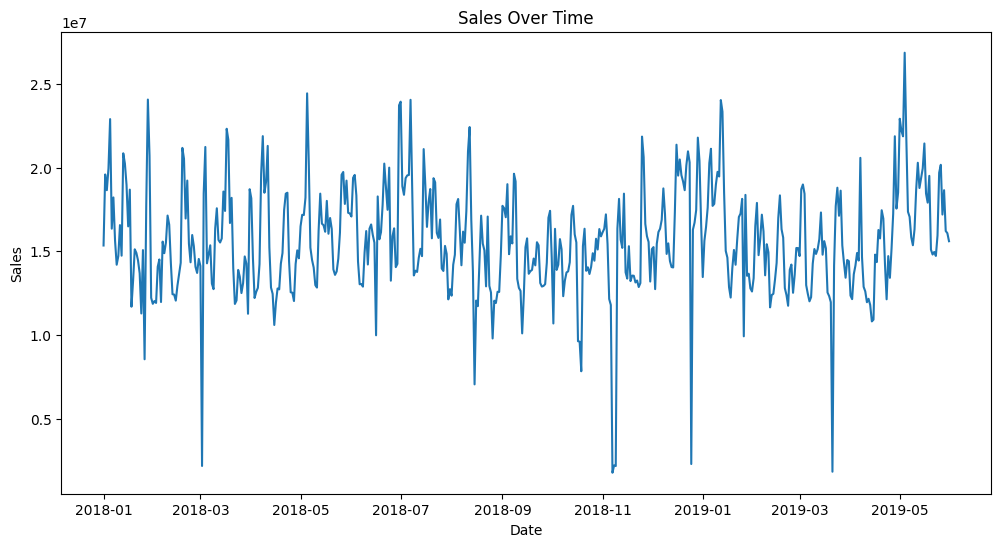

In [88]:
#Visualizing the daily sales trend
daily_sales = train.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

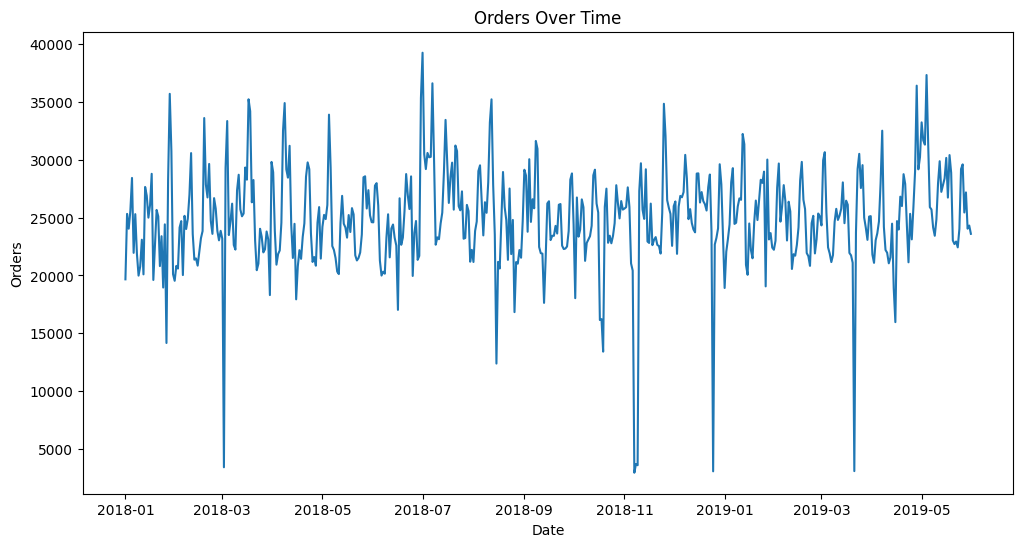

In [74]:
#Visualizing the daily orders trend
daily_orders = train.groupby('Date')['#Order'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_orders, label='Daily Orders')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

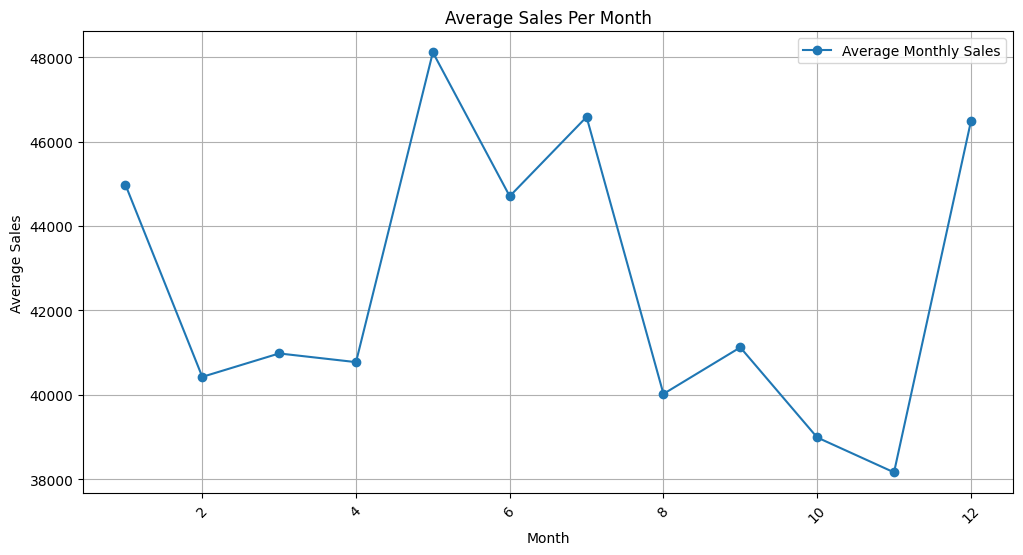

In [90]:

# Group by month name and calculate the average sales
monthly_avg_sales = train.groupby('Month')['Sales'].mean()


# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales, marker='o', label='Average Monthly Sales')
plt.title('Average Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate month names for better visibility
plt.grid()
plt.legend()
plt.show()

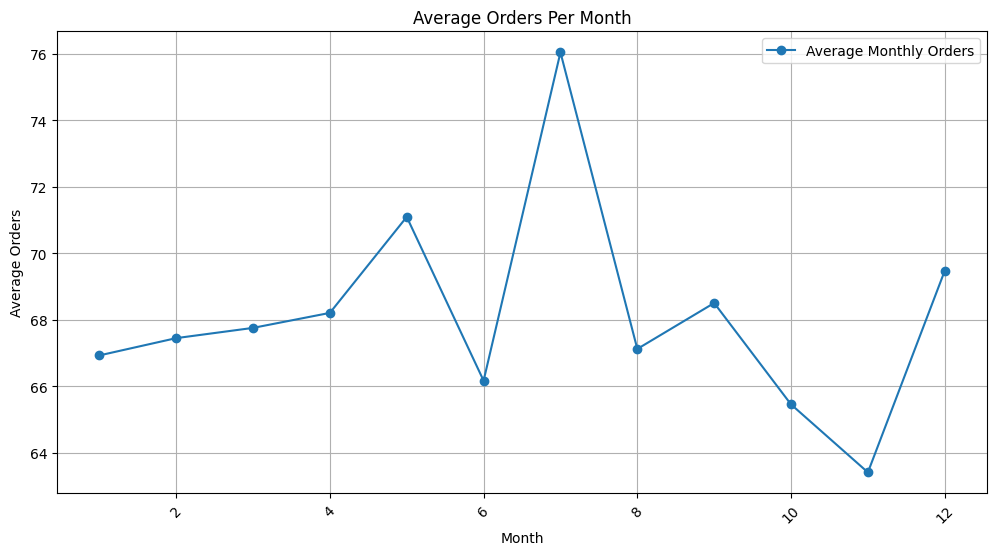

In [ ]:

# Group by month name and calculate the average sales
monthly_avg_orders = train.groupby('Month')['#Order'].mean()


# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_orders, marker='o', label='Average Monthly Orders')
plt.title('Average Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)  
plt.grid()
plt.legend()
plt.show()

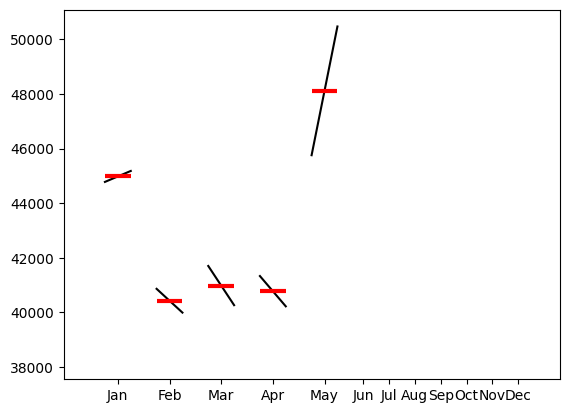

In [92]:
#seasonality check
from statsmodels.graphics.tsaplots import month_plot
month_plot(train['Sales'].resample('M').mean())
plt.show()

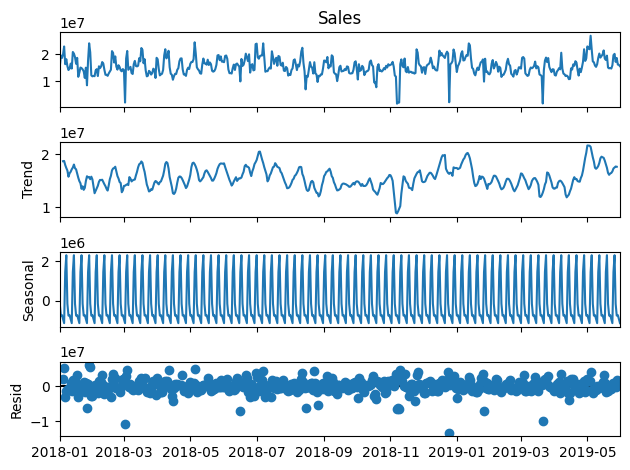

In [93]:
#Seasonal decomposition- weekly seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)
decomposition.plot()
plt.show()

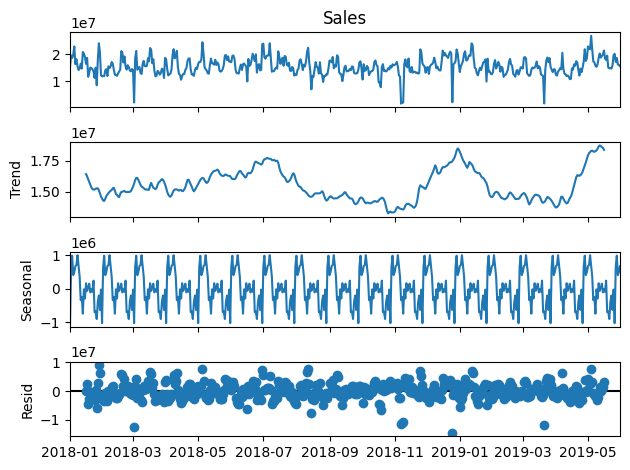

In [94]:
 # Monthly seasonality
decomposition = seasonal_decompose(daily_sales, model='additive', period=30) 
decomposition.plot()
plt.show()

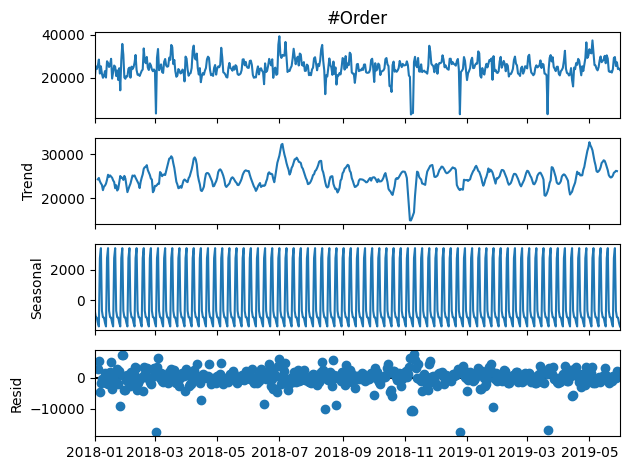

In [95]:
#Seasonal decomposition- weekly seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_orders, model='additive', period=7)
decomposition.plot()
plt.show()

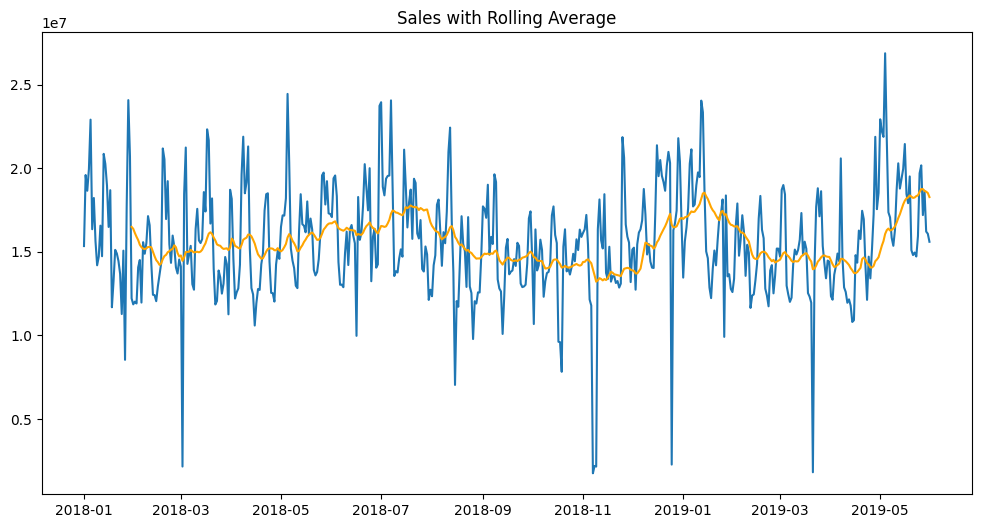

In [96]:
#Seasonality checking (30-day moving average)
rolling_sales = daily_sales.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_sales, label='30-Day Moving Average', color='orange')
plt.title('Sales with Rolling Average')
plt.show()

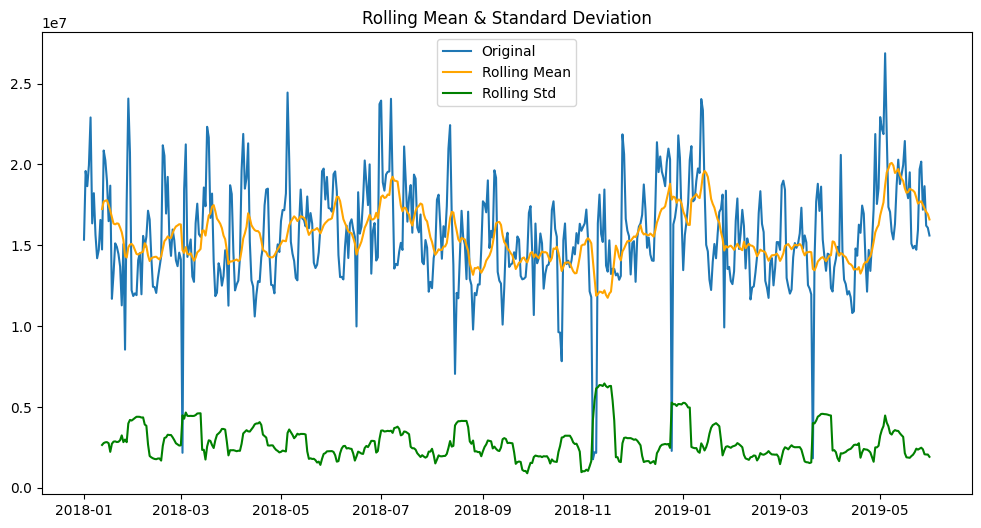

In [97]:
#Plotting rolling statistics:(A stationary time series has constant mean and variance over time)
rolling_mean = daily_sales.rolling(window=12).mean()
rolling_std = daily_sales.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [98]:
#Analysis of Stationarity(Augmented Dickey-Fuller Test:)
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_sales.dropna())
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

p-value: 0.007386718711362291
The data is stationary.


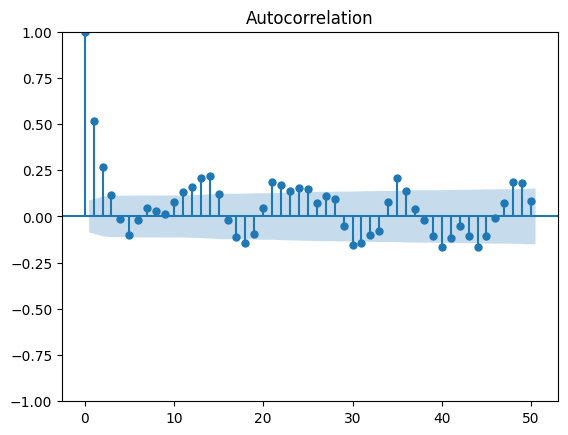

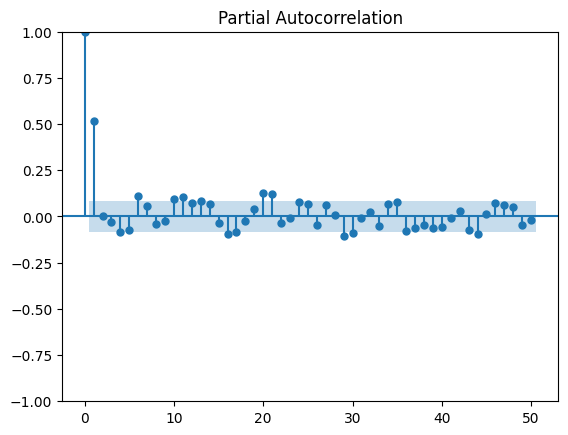

In [59]:
# ACF and PACF plots to identify lag relationships
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(daily_sales.dropna(), lags=50)
plt.show()

plot_pacf(daily_sales.dropna(), lags=50)
plt.show()

BASELINE MODEL:
For time series forecasting, starting with a baseline model is a good practice, but a simple linear regression model might not be suitable for time series data due to its inherent sequential nature. Instead, I use baseline models designed for time series forecasting - **Exponential Smoothing**

In [60]:
#Simple Exponential Smoothing Model and Prediction
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#sales model
sales_model = SimpleExpSmoothing(train['sqrt_sales']).fit()
sales_forecast = sales_model.forecast(steps=6)

# Orders Model
orders_model = SimpleExpSmoothing(train['sqrt_orders']).fit()
orders_forecast = orders_model.forecast(len(test))  

print("Sales Forecast for the next 6 months")
print(sales_forecast)
print("\nOrders Forecast for the next 6 periods:")
print(orders_forecast)

/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Sales Forecast for the next 6 months
188340    213.249832
188341    213.249832
188342    213.249832
188343    213.249832
188344    213.249832
188345    213.249832
dtype: float64

Orders Forecast for the next 6 periods:
188340    8.367162
188341    8.367162
188342    8.367162
188343    8.367162
188344    8.367162
            ...   
210600    8.367162
210601    8.367162
210602    8.367162
210603    8.367162
210604    8.367162
Length: 22265, dtype: float64


/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


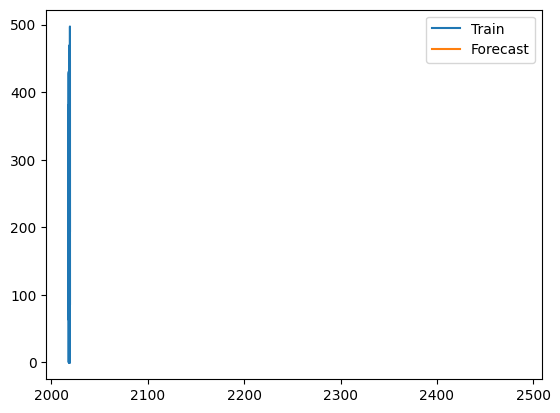

In [61]:
#plot train and forecast
plt.plot(train['sqrt_sales'], label='Train')
plt.plot(sales_forecast, label = 'Forecast')
plt.legend()
plt.show()

**Evaluate Baseline Model Performance**
Evaluate the baseline model using metrics such as:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Percentage Error (MAPE)

TIMESERIES FORECASTING (SARIMAX MODEL)

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMAX model
sarimax_model = SARIMAX(train['sqrt_sales'], 
                        order=(1, 0, 3),  # Based on ACF/PACF
                        seasonal_order=(1, 0, 3, 12),  # Monthly seasonality
                        start_parms=[0.5] * 7,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

sarimax_fit = sarimax_model.fit()

# Print the model summary
print(sarimax_fit.summary())

# Forecast the next 6 months
forecast = sarimax_fit.forecast(steps=6)
forecast_inverted = forecast**2

# Plot the forecast
forecast_dates = pd.date_range(start="2019-06-01", periods=6, freq='M')
plt.plot(train['sqrt_sales'], label='Train')
plt.plot(forecast_dates, forecast_inverted, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMAX sales Forecast')
plt.show()


/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06247D+00    |proj g|=  4.79574D-01


 This problem is unconstrained.



At iterate    5    f=  5.05377D+00    |proj g|=  6.11550D-01

At iterate   10    f=  5.05123D+00    |proj g|=  5.91163D-01

At iterate   15    f=  5.04889D+00    |proj g|=  3.56570D-01

At iterate   20    f=  5.04793D+00    |proj g|=  6.00737D-01

At iterate   25    f=  5.04660D+00    |proj g|=  2.53427D+00

At iterate   30    f=  5.04447D+00    |proj g|=  4.33058D+00


KeyboardInterrupt: 

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMAX model
sarimax_model = SARIMAX(train['sqrt_orders'], 
                        order=(1, 0, 3),  # Based on ACF/PACF
                        seasonal_order=(1, 0, 3, 12),  # Monthly seasonality
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

sarimax_orders = sarimax_model.fit()

# Print the model summary
print(sarimax_orders.summary())

# Forecast the next 6 months
forecast = sarimax_orders.forecast(steps=6)
forecast_inverted = forecast**2


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91466D+00    |proj g|=  4.78285D-01


 This problem is unconstrained.



At iterate    5    f=  1.90535D+00    |proj g|=  4.48009D-01

At iterate   10    f=  1.90356D+00    |proj g|=  8.86256D-01

At iterate   15    f=  1.90083D+00    |proj g|=  1.09761D+00

At iterate   20    f=  1.90064D+00    |proj g|=  5.14975D-01

At iterate   25    f=  1.90019D+00    |proj g|=  1.47715D+00

At iterate   30    f=  1.89698D+00    |proj g|=  6.96806D-01

At iterate   35    f=  1.89505D+00    |proj g|=  2.01400D+00

At iterate   40    f=  1.89417D+00    |proj g|=  1.53018D-01


KeyboardInterrupt: 

In [ ]:

# Plot the forecast
forecast_dates = pd.date_range(start="2019-06-01", periods=6, freq='M')
plt.plot(train['sqrt_orders'], label='Train')
plt.plot(forecast_dates, forecast_inverted, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

In [ ]:
#weekly 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on training data
model = SARIMAX(train['Sales'], 
                order=(1, 0, 3),
                seasonal_order=(1, 0, 3, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit()
print(sarima_model.summary())

# Forecast for the next 6 months
forecast = sarima_model.forecast(steps=6)
print(forecast)

/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11428D+01    |proj g|=  4.94581D-01


 This problem is unconstrained.



At iterate    5    f=  1.11289D+01    |proj g|=  1.62004D+00

At iterate   10    f=  1.11280D+01    |proj g|=  7.58186D-02

At iterate   15    f=  1.11254D+01    |proj g|=  4.94059D-01

At iterate   20    f=  1.11239D+01    |proj g|=  2.03747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     41      1     0     0   1.819D-02   1.112D+01
  F =   11.123920566668543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:               18

/Users/lavanyamullachery/Desktop/GIT/Product_SalesForecasting_PP/pp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
